# Chapter 5

## Question 6

Investigating bootstrapping as a way to estimate the model error

In [1]:
# import sklearn.linear_model
# import sklearn.model_selection
import numpy as np
import statsmodels.api as sm
import sklearn.utils
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

In [2]:
default = sm.datasets.get_rdataset("Default", "ISLR").data
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


### (a) Determine the estimated standard errors for the coefficients associated with `income` and `balance` in a multiple logistic regression model

In [9]:
# We need to use statsmodels for this!
y = default.default == "Yes"  # Have to encode this ourselves, apparently. 
X = sm.add_constant(default[["income", "balance"]])
logistic_model =  sm.Logit(y, X)
results = logistic_model.fit()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


In [4]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sat, 25 May 2019   Pseudo R-squ.:                  0.4594
Time:                        22:06:47   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
balance        0.0056      0.000     24.835      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [5]:
std_errors = results.bse

### (b/c) Use bootstrapping to estimate the standard errrors of the coefficients for `income` and `balance`

In [12]:
consts = []
incomes = []
balances = []
for i in range(1000):
    X_boot, y_boot = sklearn.utils.resample(X, y, replace=True, n_samples=500)
    logistic_model =  sm.Logit(y_boot, X_boot)
    results = logistic_model.fit()
    b0, b1, b2 = results.params
    consts.append(b0)
    incomes.append(b1)
    balances.append(b2)

Optimization terminated successfully.
         Current function value: 0.094765
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.071639
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.074502
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.081638
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.115395
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.071380
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.087676
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.048037
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.075496
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.0

Optimization terminated successfully.
         Current function value: 0.081270
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.055102
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.086737
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.081630
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.113676
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.082169
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.085978
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.096747
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.094027
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.06

Optimization terminated successfully.
         Current function value: 0.097956
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.061374
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.090859
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.088439
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.092735
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.059850
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.082196
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.076802
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.067382
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.065

Optimization terminated successfully.
         Current function value: 0.055758
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.070402
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.081668
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.068147
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.070380
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.086305
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.104444
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.087977
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.070934
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.0

Optimization terminated successfully.
         Current function value: 0.080717
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.094265
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.062138
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.081660
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.049408
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.060684
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.066889
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.082462
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.082278
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.084390
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.070126
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.093328
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078298
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.069031
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.079805
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.085266
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.076923
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.092395
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.079197
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.104199
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.073661
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.093436
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.061787
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.065873
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.087542
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.072104
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.068692
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.0

Optimization terminated successfully.
         Current function value: 0.068729
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.063268
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.098345
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.060370
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.087751
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.086100
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.062009
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.066424
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.064764
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.0

Optimization terminated successfully.
         Current function value: 0.063389
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.087289
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.096734
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.071313
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.080929
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.114556
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.066309
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.117161
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.095632
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.04

Optimization terminated successfully.
         Current function value: 0.091487
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.096047
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.083855
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.070004
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.094146
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.124120
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.069571
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.048434
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.066167
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.079

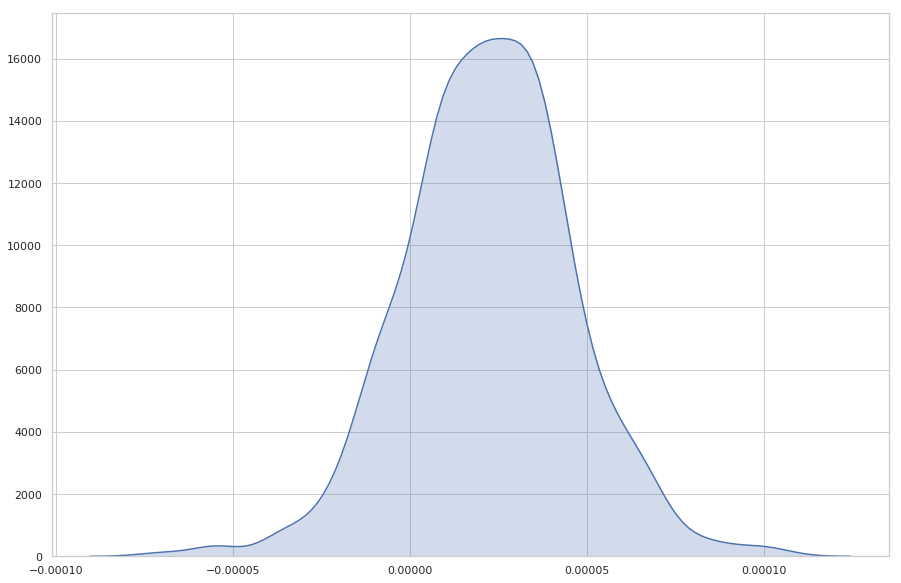

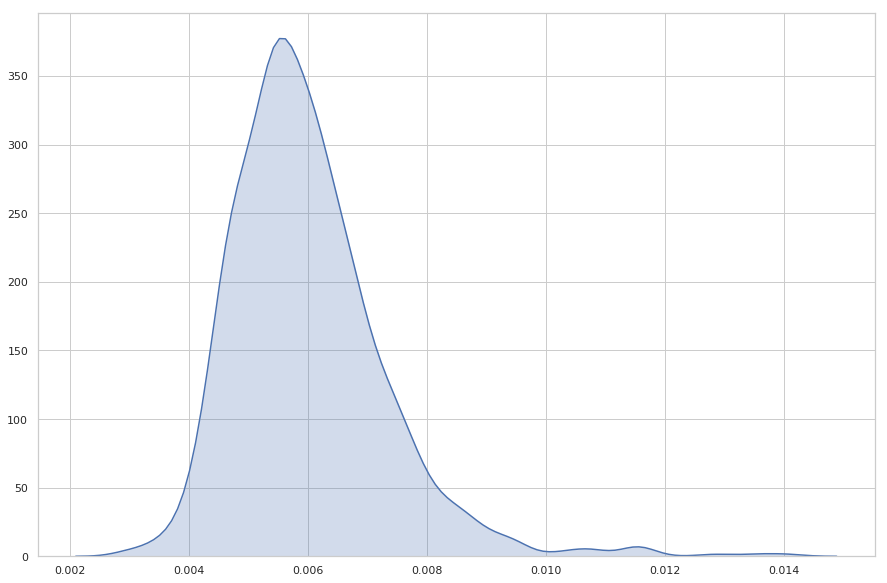

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
sns.kdeplot(incomes, ax=ax, shade=True)

fig, ax = plt.subplots(figsize=(15,10))
sns.kdeplot(balances, ax=ax, shade=True)

In [14]:
# So we have lots of estimates of the coefficients. Estimate the mean and error, and compare
print("Bootstrap estimates | Analytical estimates")
print(f"Balance: {np.std(balances, ddof=1)} | {std_errors.balance}")
print(f"Income: {np.std(incomes, ddof=1)} | {std_errors.income}")


Bootstrap estimates | Analytical estimates
Balance: 0.0012753270933022498 | 0.00022738138476844716
Income: 2.387178543154313e-05 | 4.985245461753051e-06


The bootstrap errors are roughly an order of magnitude higher.